In [1]:
# Importing necessary libraries

import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading dataset

df = pd.read_csv("C:\\Users\\Ujjawal\\Downloads\\Deep learning 1 exercise files\\Ex_Files_Deep_Learning_Getting_Started\\Exercise Files\\iris.csv")

In [4]:
# Brief info of the dataset

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Using label encoder to convert string into a numerical value for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Species'] = label_encoder.fit_transform(df['Species'])

In [6]:
# Converting input into numpy array

np_df = df.to_numpy()

In [7]:
# Separating features and target variables
# Here feature variables are: Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width
# Target Variable is Species

x_df = np_df[:, 0:4]
y_df = np_df[:,4]

In [8]:
print("\nFeatures before scaling :\n--------------------------------")
print(x_df[:5,:])
print("\nTarget after scaling :\n--------------------------------")
print(y_df[:5])


Features before scaling :
--------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target after scaling :
--------------------------------
[0. 0. 0. 0. 0.]


In [9]:
# Creating a scaler model that is fit on the input model

scaler = StandardScaler().fit(x_df)

In [10]:
# scaling the numeric feature column

x_df = scaler.transform(x_df)

In [11]:
# Converting target variable as a one-hot encoding array

y_df = tf.keras.utils.to_categorical(y_df,3)

In [12]:
print("\nFeatures before scaling :\n--------------------------------")
print(x_df[:5,:])
print("\nTarget after one-hot encoding :\n--------------------------------")
print(y_df[:5,:])


Features after scaling :
--------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot encoding :
--------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [13]:
# Splitting dataset into training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.10)

print("\nTrain Test Dimensions :\n--------------------------------")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


Train Test Dimensions :
--------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


# Creating a deep-learning model

Creating a model in Keras requires defining the following:

1.) Number of hidden layers
2.) Number of nodes in each layer
3.) Activation functions
4.) Loss function and accuracy measurements

In [14]:
from tensorflow import keras

In [15]:
# Number of classes in the target variable

nb_class = 3

In [16]:
# Creating a sequential model in keras

model = tf.keras.models.Sequential()

In [17]:
# Adding the first hidden layer

model.add(keras.layers.Dense(128,                     # Number of nodes
                            input_shape = [4,],       # Number of input variables
                            name = 'Hidden-layer-1',  # Logical name
                            activation = 'relu'))     # Activation function

In [18]:
# Adding a second hidden layer

model.add(keras.layers.Dense(128,                           
                            name = 'Hidden-layer-2',  
                            activation = 'relu'))

In [19]:
# Adding output layer with softmax activation

model.add(keras.layers.Dense(nb_class,
                            name = 'Output-Layer',
                            activation = 'softmax'))

In [20]:
# Compiling the model with loss and metrics

model.compile(loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and Evaluation

In [22]:
# Making the model verbose, so we can see the progress

verb = 1

In [23]:
# Setting up hyper-parameters for training

batch = 16
epoch = 15

# Setting validation split : Percentage of training data used for validation

v_split = 0.2

In [24]:
print("\nTraining Progress: \n----------------------------------")

history = model.fit(x_train,
                   y_train,
                   batch_size = batch,
                   epochs = epoch,
                   verbose = verb,
                   validation_split = v_split)


Training Progress: 
----------------------------------
Epoch 1/15


7/7 [==============================] - 1s 53ms/step - loss: 0.8127 - accuracy: 0.7222 - val_loss: 0.5819 - val_accuracy: 0.8889
Epoch 2/15
7/7 [==============================] - 0s 12ms/step - loss: 0.5435 - accuracy: 0.8056 - val_loss: 0.4487 - val_accuracy: 0.8889
Epoch 3/15
7/7 [==============================] - 0s 11ms/step - loss: 0.4348 - accuracy: 0.8333 - val_loss: 0.3768 - val_accuracy: 0.8519
Epoch 4/15
7/7 [==============================] - 0s 11ms/step - loss: 0.3698 - accuracy: 0.8333 - val_loss: 0.3231 - val_accuracy: 0.9259
Epoch 5/15
7/7 [==============================] - 0s 9ms/step - loss: 0.3313 - accuracy: 0.8611 - val_loss: 0.2877 - val_accuracy: 0.9259
Epoch 6/15
7/7 [==============================] - 0s 11ms/step - loss: 0.3011 - accuracy: 0.8611 - val_loss: 0.2582 - val_accuracy: 0.9259
Epoch 7/15
7/7 [==============================] - 0s 9ms/step - loss: 0.2775 - accuracy: 0.8611 - val_loss: 0


Accuracy during training :
------------------------------


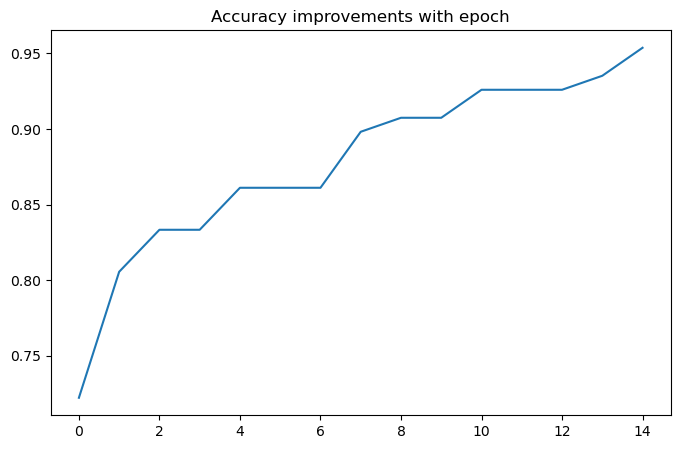

In [25]:
print("\nAccuracy during training :\n------------------------------")

# Plot accuracy after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with epoch")
plt.show()

In [26]:
# Evaluating the model against test dataset

print("\nEvaluation against test dataset :\n-------------------------")
model.evaluate(x_test, y_test)


Evaluation against test dataset :
-------------------------
1/1 [==============================] - 0s 32ms/step - loss: 0.1310 - accuracy: 1.0000


[0.13095246255397797, 1.0]

Here, we are getting 100% accuracy

# Saving and Loading models

The training and inference environment are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environment for actual prediction.

In [27]:
# Saving a model

model.save("iris_save")

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


In [29]:
# Loading the model

loaded_model = keras.models.load_model("iris_save")

In [30]:
# Model summary

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Predictions with Deep Learning Models

In [31]:
# Raw prediction data

prediction_input = [[6.6, 3., 4.4, 1.4]]

In [32]:
# Scale prediction data with the same scaling model

scaled_input = scaler.transform(prediction_input)

In [33]:
# Get raw prediction probabilities

raw_predict = model.predict(scaled_input)
print("Raw prediction ouput (Probabilities): ", raw_predict)

1/1 [==============================] - 0s 127ms/step
Raw prediction ouput (Probabilities):  [[0.01147249 0.8259054  0.16262214]]


In [36]:
# prediction

predict = np.argmax(raw_predict)
print("Prediction is ", label_encoder.inverse_transform([predict]))

Prediction is  ['versicolor']


Species with the given prediction input is Versicolor with the highest probability of 82.6%